In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from math import sqrt

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df=pd.read_csv('testdataset.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,221900,3,1,1180,5650,1,0,3,1180,0,...,0,0,0,0,0,0,1,0,0,0
1,538000,3,2,2570,7242,2,0,3,2170,400,...,0,0,0,1,0,0,0,0,0,0
2,180000,2,1,770,10000,1,0,3,770,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3,1960,5000,1,0,5,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000,3,2,1680,8080,1,0,3,1680,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'houseage', 'has_underground', 'has_renovated', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kent', 'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')

In [11]:
df.shape

(21393, 40)

In [12]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [13]:
df.corr()['price']

price                 1.00000
bedrooms              0.31639
bathrooms             0.50581
sqft_living           0.69787
sqft_lot              0.08822
floors                0.23782
view                  0.39979
condition             0.03842
sqft_above            0.59958
sqft_basement         0.32202
yr_built              0.05411
lat                   0.31178
long                  0.01875
houseage             -0.05379
has_underground       0.18421
has_renovated         0.12262
city_Bellevue         0.14670
city_Black Diamond   -0.02179
city_Bothell         -0.02694
city_Carnation       -0.01749
city_Duvall          -0.02981
city_Enumclaw        -0.06542
city_Fall City        0.00823
city_Federal Way     -0.16593
city_Issaquah         0.08721
city_Kent            -0.16195
city_Kirkland         0.06616
city_Maple Valley    -0.08004
city_Medina           0.20376
city_Mercer Island    0.21137
city_North Bend      -0.02799
city_Redmond          0.09484
city_Renton          -0.10633
city_Seatt

In [264]:
df['yr_built'].min()

1900

In [14]:
X = df.drop(['price','houseage','yr_built'], axis=1)
y = df['price']

In [280]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21393 entries, 0 to 21392
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21393 non-null  int64  
 1   bathrooms           21393 non-null  int64  
 2   sqft_living         21393 non-null  int64  
 3   sqft_lot            21393 non-null  int64  
 4   floors              21393 non-null  int64  
 5   view                21393 non-null  int64  
 6   condition           21393 non-null  int64  
 7   sqft_above          21393 non-null  int64  
 8   lat                 21393 non-null  float64
 9   long                21393 non-null  float64
 10  has_underground     21393 non-null  int64  
 11  has_renovated       21393 non-null  int64  
 12  city_Bellevue       21393 non-null  int64  
 13  city_Black_Diamond  21393 non-null  int64  
 14  city_Bothell        21393 non-null  int64  
 15  city_Carnation      21393 non-null  int64  
 16  city

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
# ohe=OneHotEncoder()

In [79]:
# ohe.fit([['city']])

In [80]:
# column_trans=make_column_transformer((ohe,['city']),remainder='passthrough')

##### linear regression

In [81]:
linear_model = LinearRegression()

In [82]:
# pipe=make_pipeline(column_trans,linear_model)

In [83]:
# pipe.fit(X_train, y_train)

In [84]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [85]:
linear_predictions = linear_model.predict(X_test)

In [86]:
# linear_predictions=pipe.predict(X_test)

In [87]:
r2_score(y_test,linear_predictions)

0.7557808562536669

##### choosing the traintest split having max r2 score

In [88]:
linear_score = explained_variance_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression Score: {:.4f}".format(linear_score))
print("Linear Regression MAE: {:.4f}".format(linear_mae))
print("Linear Regression RMSE: {:.4f}".format(linear_rmse))


Linear Regression Score: 0.7561
Linear Regression MAE: 112054.8184
Linear Regression RMSE: 186052.0834


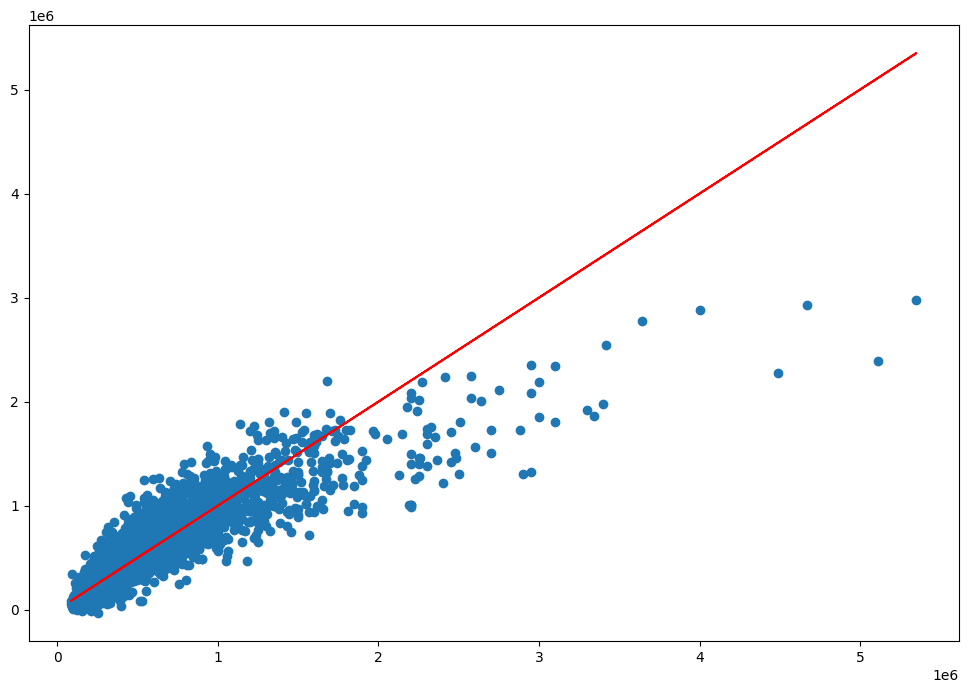

In [91]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, linear_predictions)
plt.plot(y_test, y_test, color='r')


##### standardiazation + linear regression

In [ ]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train_std, y_train)

In [ ]:
linear_predictions = linear_model.predict(X_test_std)

In [ ]:
linear_score = explained_variance_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression Score: {:.4f}".format(linear_score))
print("Linear Regression MAE: {:.4f}".format(linear_mae))
print("Linear Regression RMSE: {:.4f}".format(linear_rmse))

##### random forest regression

In [ ]:
# X = df.drop(['price','sqft_living15','sqft_lot15','houseage'],axis=1)
# y = df['price'].values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
# regressor.fit(X_train, y_train)

In [ ]:
# X.columns

##### self defined input values using random forest regressor


In [ ]:
# regressor.predict(features)

##### testing set values

In [ ]:
# rand_forest_predictions = regressor.predict(X_test)

In [ ]:
# regressor.score(X_test,y_test)

In [ ]:
# rand_forest_score = explained_variance_score(y_test, rand_forest_predictions)
# rand_forest_mae = mean_absolute_error(y_test, rand_forest_predictions)
# rand_forest_rmse = sqrt(mean_squared_error(y_test, rand_forest_predictions))

# print("Random Forest Score: {:.4f}".format(rand_forest_score))
# print("Random Forest MAE: {:.4f}".format(rand_forest_mae))
# print("Random Forest RMSE: {:.4f}\n".format(rand_forest_rmse))

### MAE 
##### takes the average sum of the absolute differences between the actual and the predicted values. For a data point xi and its predicted value yi, n being the total number of data points in the dataset, the mean absolute error is defined as:

##### MAE
##### 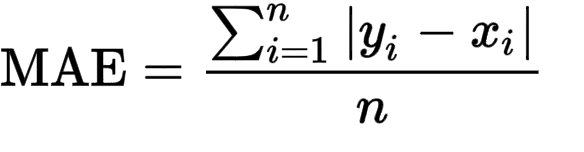

In [91]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'houseage', 'has_underground', 'has_renovated', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kent', 'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')

In [89]:
import pickle

In [90]:
pickle.dump(linear_model, open('test_model.pkl', 'wb'))

In [224]:
# pickle.dump(pipe, open('pipeline_model.pkl', 'wb'))

NameError: name 'pipe' is not defined

In [95]:
# model=pickle.load(open('model.pkl','rb'))

In [96]:
# pipe.predict(pd.DataFrame([[1,1,1200,6000,2,1,2,1200,47.5,-122.2,0,0,'Seattle']],columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
#        'condition', 'sqft_above', 'lat', 'long', 'has_underground','has_renovated', 'city']))